**When Should You Consider Dimensionality Reduction for ANN?**
You should consider reducing dimensions if:

You have a small dataset (few samples) → Risk of overfitting.

High multicollinearity among features (many correlated features).

You notice the model is overfitting quickly and generalizing poorly.

Training time is a concern (ANNs scale with input size).

Noise features are present (features that don’t contribute to the target).

**Options for Dimensionality Reduction:**
PCA (Principal Component Analysis) → Unsupervised, reduces redundancy.

Feature Selection techniques (like SelectKBest, mutual information).

Autoencoders → Learn compressed representations using a neural network itself.

Manual Domain Knowledge-based feature pruning.


**CODE:**
Check feature importance using Random Forest (or any estimator)

Check PCA explained variance to decide on dimensionality reduction

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


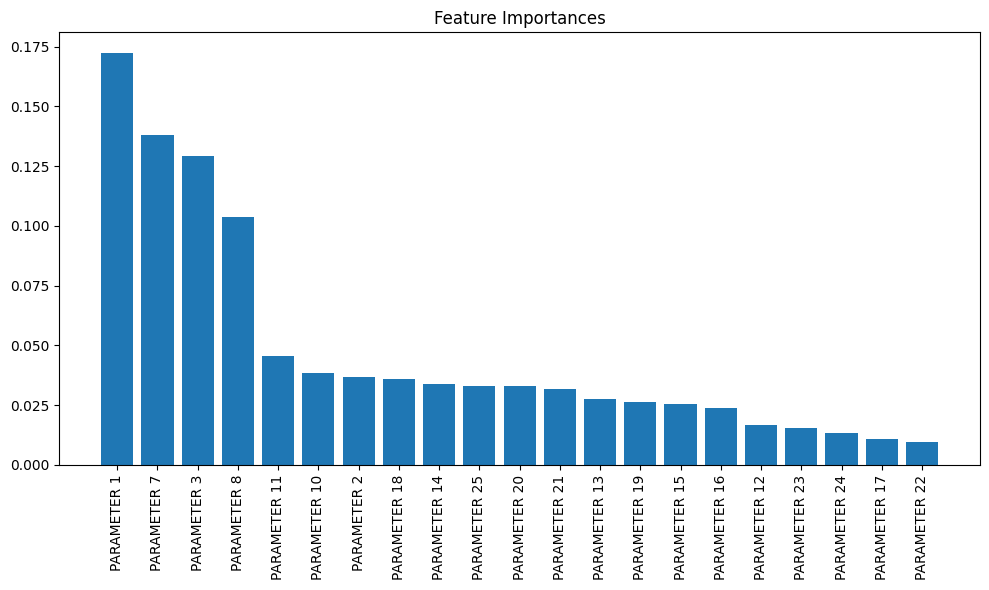

In [3]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier  # Use RandomForestRegressor for regression tasks
import matplotlib.pyplot as plt

#load data from drive Data/00_Data.xlsx
df = pd.read_excel('/content/drive/MyDrive/data/00_Data.xlsx')

#print NA data
#print(df.isna().sum())

#remove NA rows
df = df.dropna()

y = df['DEFECTIVE']
X = df.drop('DEFECTIVE', axis=1)

#convert defective values yes and no to categorical 0 and 1
le = LabelEncoder()
y = le.fit_transform(y)

scaler = StandardScaler()
X = scaler.fit_transform(X)
#recreate the dataframe
X = pd.DataFrame(X, columns=df.columns[:-1])

model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X, y)

# Get feature importances
importances = model.feature_importances_
feature_names = X.columns

# Plot
indices = np.argsort(importances)[::-1]
plt.figure(figsize=(10, 6))
plt.title("Feature Importances")
plt.bar(range(X.shape[1]), importances[indices], align="center")
plt.xticks(range(X.shape[1]), feature_names[indices], rotation=90)
plt.tight_layout()
plt.show()
